In [1]:
import sys
print(sys.version)

3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]


In [3]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [4]:
# Define the instruments(stocks) to download
companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockheed Martin': 'LMT',
    'McDonalds': 'MCD',
    'Microsoft': 'MSFT',
    'Intel': 'INTC',
    'Navistar': 'NAV',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'General Electricals': 'GE',
    'Symantec': 'SYMC',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca Cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Toyota': 'TM',
    'Honda': 'HMC',
    'Mistubishi': 'MSBHY',
    'Sony': 'SNE',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero Energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])
print(companies)

[('Apple', 'AAPL'), ('Amazon', 'AMZN'), ('American Express', 'AXP'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('Ford', 'F'), ('General Electricals', 'GE'), ('Honda', 'HMC'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Mistubishi', 'MSBHY'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Sony', 'SNE'), ('Symantec', 'SYMC'), ('Toyota', 'TM'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [7]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2018-06-06'
end_date = '2019-06-06'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
panel_data = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(panel_data.axes)

[DatetimeIndex(['2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11',
               '2018-06-12', '2018-06-13', '2018-06-14', '2018-06-15',
               '2018-06-18', '2018-06-19',
               ...
               '2019-05-24', '2019-05-28', '2019-05-29', '2019-05-30',
               '2019-05-31', '2019-06-03', '2019-06-04', '2019-06-05',
               '2019-06-06', '2019-06-07'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None), MultiIndex(levels=[['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], ['AAPL', 'AMZN', 'AXP', 'BA', 'BAC', 'CVX', 'F', 'GE', 'HMC', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSBHY', 'MSFT', 'NAV', 'NOC', 'PEP', 'SNE', 'SYMC', 'TM', 'TXN', 'VLO', 'WBA', 'XOM']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [11]:
print(panel_data.head())
print(panel_data.columns)
#panel_data.drop(['labels'], 0)
print(panel_data.columns)
x, y = panel_data.shape
print("{} x {}".format(x, y))

Attributes        High                                                  \
Symbols           AAPL         AMZN         AXP          BA        BAC   
Date                                                                     
2018-06-06  194.080002  1714.500000  101.000000  371.600006  30.049999   
2018-06-07  194.199997  1699.900024  102.389999  374.480011  30.309999   
2018-06-08  192.000000  1689.439941  101.300003  371.420013  30.049999   
2018-06-11  191.970001  1694.239990  101.669998  373.329987  30.410000   
2018-06-12  192.610001  1699.510010  101.500000  372.730011  30.270000   

Attributes                                                         ...      \
Symbols            CVX      F         GE        HMC         IBM    ...       
Date                                                               ...       
2018-06-06  123.690002  12.00  13.355769  32.240002  144.720001    ...       
2018-06-07  127.980003  12.15  13.269231  32.410000  146.699997    ...       
2018-06-08  127.3

In [19]:
# find stock open and close data value
panel_data_close = [panel_data.iloc[i].loc['Close'] for i in range(0, x)]
stock_close = np.array(panel_data_close).T 
row, column = stock_close.shape
print(stock_close.shape)

panel_data_open = [panel_data.iloc[i].loc['Open'] for i in range(0, x)]
stock_open = np.array(panel_data_open).T 

(28, 253)


In [20]:
#calculate daily stock movement
movements = np.zeros([row, column])

for i in range(0, row):
        movements[i, :] = np.subtract(stock_close[i, :], stock_open[i,:])
        
for i in range(0, len(companies)):
    print("Company {} moved {}".format(companies[i][0], sum(movements[i][:])))

Company Apple moved 23.930023193359375
Company Amazon moved -357.759033203125
Company American Express moved 15.389961242675781
Company Boeing moved 32.949920654296875
Company Bank of America moved 3.280000686645508
Company Chevron moved -24.579994201660156
Company Ford moved -2.550004482269287
Company General Electricals moved -3.0973033905029297
Company Honda moved -4.339996337890625
Company IBM moved -1.9398117065429688
Company Intel moved 1.1399917602539062
Company Johnson & Johnson moved 22.820022583007812
Company Coca Cola moved 9.820003509521484
Company Lockheed Martin moved -14.379791259765625
Company MasterCard moved 46.269927978515625
Company McDonalds moved 29.089950561523438
Company Mistubishi moved -1.9000053405761719
Company Microsoft moved 4.739936828613281
Company Navistar moved -8.469982147216797
Company Northrop Grumman moved 8.369842529296875
Company Pepsi moved 25.590042114257812
Company Sony moved -3.610027313232422
Company Symantec moved -3.560009002685547
Company

(28, 253)


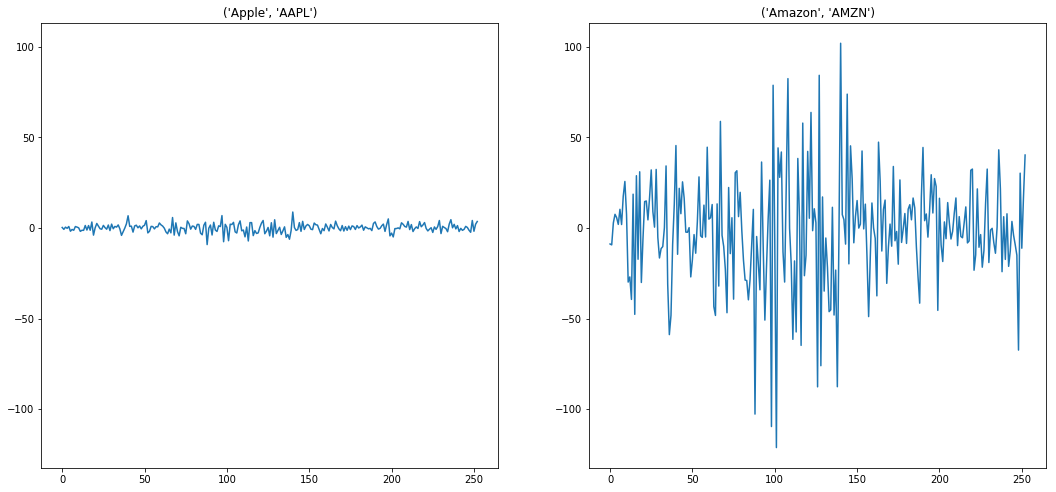

In [24]:
print(movements.shape)

#Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18, 18))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [25]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.3852591106613611
-0.5238665568302164
-0.00029489922947597636


(28, 253)


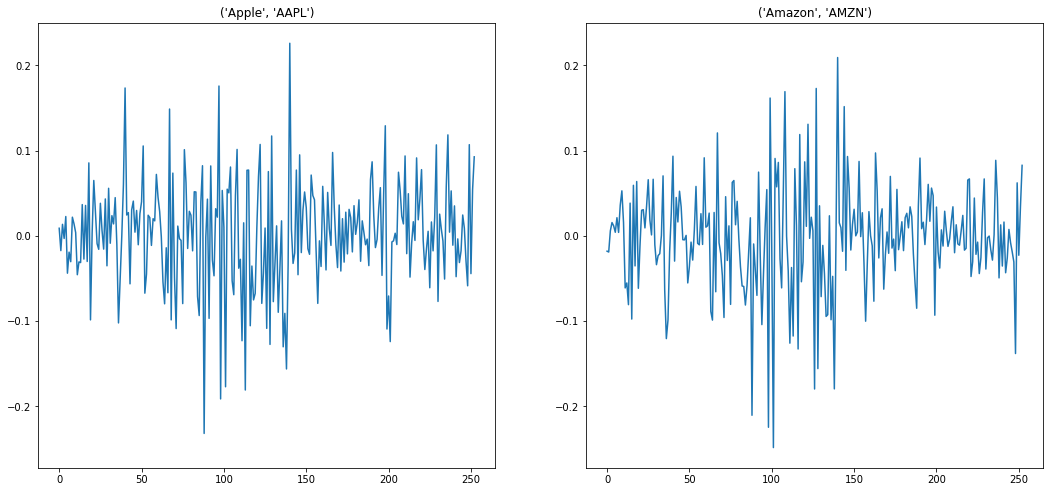

In [26]:
print(new.shape)

#Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize = (18, 18))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [27]:
# Import necessary libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

# Define a normalizer
normalizer = Normalizer()

# Create a KMeans model - 10 clusters
kmeans = KMeans(n_clusters = 10, max_iter = 1000)

# Make a pipline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer, kmeans)

In [28]:
# Fit pipeline to daily stock movements
pipeline.fit(movements)

print(kmeans.inertia_)

8.109780829683814


In [29]:
# Predict the cluster labels
labels = pipeline.predict(movements)

# Create a Dataframe aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                  companies
6        0                  (Ford, F)
7        0  (General Electricals, GE)
0        1              (Apple, AAPL)
1        1             (Amazon, AMZN)
17       1          (Microsoft, MSFT)
14       1           (MasterCard, MA)
24       2   (Texas Instruments, TXN)
10       2              (Intel, INTC)
20       3               (Pepsi, PEP)
11       3   (Johnson & Johnson, JNJ)
12       3            (Coca Cola, KO)
15       3           (McDonalds, MCD)
2        4    (American Express, AXP)
4        4     (Bank of America, BAC)
19       5    (Northrop Grumman, NOC)
13       5     (Lockheed Martin, LMT)
16       6        (Mistubishi, MSBHY)
9        6                 (IBM, IBM)
8        6               (Honda, HMC)
21       6                (Sony, SNE)
22       6           (Symantec, SYMC)
23       6               (Toyota, TM)
3        6               (Boeing, BA)
26       7            (Walgreen, WBA)
5        8             (Chevron, CVX)
25       8  

In [30]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on the reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a Datafram aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                  companies
15       0           (McDonalds, MCD)
11       0   (Johnson & Johnson, JNJ)
23       1               (Toyota, TM)
3        1               (Boeing, BA)
27       2               (Exxon, XOM)
5        2             (Chevron, CVX)
17       3          (Microsoft, MSFT)
14       3           (MasterCard, MA)
0        3              (Apple, AAPL)
1        3             (Amazon, AMZN)
25       4       (Valero Energy, VLO)
4        4     (Bank of America, BAC)
8        4               (Honda, HMC)
9        5                 (IBM, IBM)
26       5            (Walgreen, WBA)
10       6              (Intel, INTC)
24       6   (Texas Instruments, TXN)
2        6    (American Express, AXP)
22       6           (Symantec, SYMC)
21       6                (Sony, SNE)
12       7            (Coca Cola, KO)
20       7               (Pepsi, PEP)
18       8            (Navistar, NAV)
16       8        (Mistubishi, MSBHY)
19       8    (Northrop Grumman, NOC)
13       8  

<Figure size 432x288 with 0 Axes>

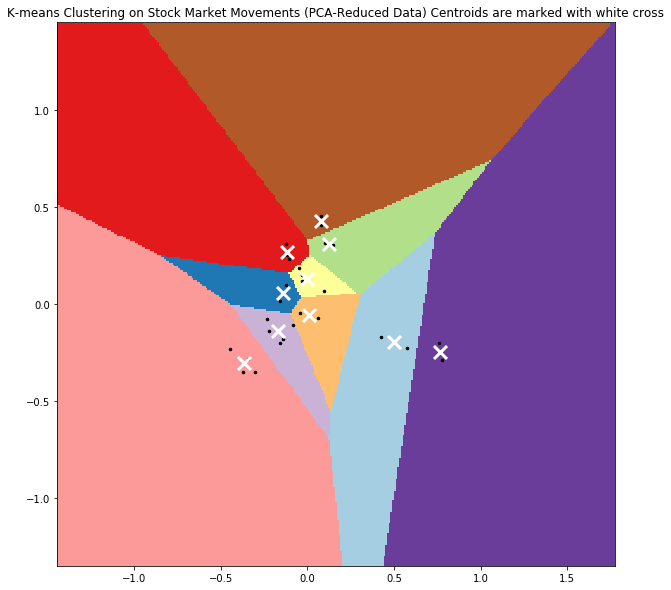

In [35]:
# Define step size of mesh.
h = 0.01

# Plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the results into a color plot
Z = Z.reshape(xx.shape)

# Define colorplot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize = (10, 10))
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=cmap, aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.',markersize=5)

# Plot the centroid of each cluster as a white 'X'
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
           marker = 'x', s=169, linewidth=3,
           color = 'w', zorder=10)


plt.title('K-means Clustering on Stock Market Movements (PCA-Reduced Data) Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()